# Mushroom classification

### Problem Statement:-
- To build a classification methodology to predict the type of Mushroom and whether it is edible or poisnous based on the given training data. 



### Data Description:-
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d


In [1]:
#Importing important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing imputer for filling nan values.
from autoimpute.imputations import SingleImputer, MultipleImputer

#Importing train test split to split into traing and testing data.
from sklearn.model_selection import train_test_split

#Importing random forest as a classifier model.
from sklearn.ensemble import RandomForestClassifier

#Importing metrics for evaluation.
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
#Importing dataset
df = pd.read_csv("mushroom.csv")

In [3]:
df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,'x','s','n','t','p','f','c','n','k','e',...,'w','w','p','w','o','p','k','s','u','p'
1,'x','s','y','t','a','f','c','b','k','e',...,'w','w','p','w','o','p','n','n','g','e'
2,'b','s','w','t','l','f','c','b','n','e',...,'w','w','p','w','o','p','n','n','m','e'
3,'x','y','w','t','p','f','c','n','n','e',...,'w','w','p','w','o','p','k','s','u','p'
4,'x','s','g','f','n','f','w','b','k','t',...,'w','w','p','w','o','e','n','a','g','e'


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises%3F                8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [5]:
df.describe()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,'x','y','n','f','n','f','c','b','b','t',...,'w','w','p','w','o','p','w','v','d','e'
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


In [6]:
for c in df:
    print(df[c].value_counts())
    print("="*50)

'x'    3656
'f'    3152
'k'     828
'b'     452
's'      32
'c'       4
Name: cap-shape, dtype: int64
'y'    3244
's'    2556
'f'    2320
'g'       4
Name: cap-surface, dtype: int64
'n'    2284
'g'    1840
'e'    1500
'y'    1072
'w'    1040
'b'     168
'p'     144
'c'      44
'u'      16
'r'      16
Name: cap-color, dtype: int64
'f'    4748
't'    3376
Name: bruises%3F, dtype: int64
'n'    3528
'f'    2160
'y'     576
's'     576
'a'     400
'l'     400
'p'     256
'c'     192
'm'      36
Name: odor, dtype: int64
'f'    7914
'a'     210
Name: gill-attachment, dtype: int64
'c'    6812
'w'    1312
Name: gill-spacing, dtype: int64
'b'    5612
'n'    2512
Name: gill-size, dtype: int64
'b'    1728
'p'    1492
'w'    1202
'n'    1048
'g'     752
'h'     732
'u'     492
'k'     408
'e'      96
'y'      86
'o'      64
'r'      24
Name: gill-color, dtype: int64
't'    4608
'e'    3516
Name: stalk-shape, dtype: int64
'b'    3776
?      2480
'e'    1120
'c'     556
'r'     192
Name: stalk-root, 

In [7]:
#Replacing the "?" with nan.
df.replace('?', np.nan, inplace=True)

In [8]:
df.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises%3F                     0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
class                          0
dtype: int64

In [9]:
df.shape

(8124, 23)

In [10]:
#creating a new data where we have filled the nan values using single imputer.
si = SingleImputer(strategy='categorical')
data = si.fit_transform(df)

In [11]:
data.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises%3F                  0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
class                       0
dtype: int64

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stalk-root', ylabel='count'>

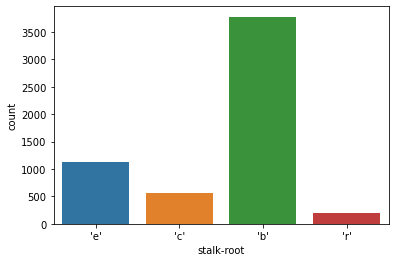

In [12]:
sns.countplot(df["stalk-root"])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stalk-root', ylabel='count'>

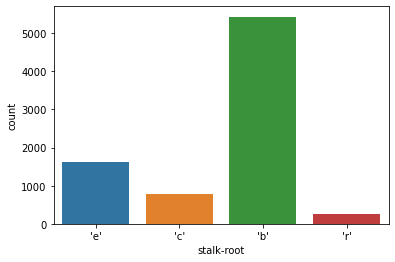

In [13]:
sns.countplot(data["stalk-root"])

In [14]:
#Dropping veil type because it contains single feature which means its mean will be 1.
data.drop(["veil-type"], axis=1, inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises%3F                8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

# Taking care of catagorical data.
- Encoding catagorical data using onehotencoding.

In [16]:
data["class"].value_counts()

'e'    4208
'p'    3916
Name: class, dtype: int64

In [17]:
#Replacing poision and edible with o  and 1.
data["class"].replace({"'e'":1, "'p'":0}, inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises%3F                8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [19]:
data

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,'x','s','n','t','p','f','c','n','k','e',...,'s','w','w','w','o','p','k','s','u',0
1,'x','s','y','t','a','f','c','b','k','e',...,'s','w','w','w','o','p','n','n','g',1
2,'b','s','w','t','l','f','c','b','n','e',...,'s','w','w','w','o','p','n','n','m',1
3,'x','y','w','t','p','f','c','n','n','e',...,'s','w','w','w','o','p','k','s','u',0
4,'x','s','g','f','n','f','w','b','k','t',...,'s','w','w','w','o','e','n','a','g',1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,'k','s','n','f','n','a','c','b','y','e',...,'s','o','o','o','o','p','b','c','l',1
8120,'x','s','n','f','n','a','c','b','y','e',...,'s','o','o','n','o','p','b','v','l',1
8121,'f','s','n','f','n','a','c','b','n','e',...,'s','o','o','o','o','p','b','c','l',1
8122,'k','y','n','f','y','f','c','n','b','t',...,'k','w','w','w','o','e','w','v','l',0


In [20]:
#Creating a loop were we are going to use get dummies for catagorical encoding.
for c in data:
    if data[c].dtype == "O":
        data = pd.get_dummies(data, columns=[c], drop_first=True)

In [21]:
data

,class,cap-shape_'c',cap-shape_'f',cap-shape_'k',cap-shape_'s',cap-shape_'x',cap-surface_'g',cap-surface_'s',cap-surface_'y',cap-color_'c',...,population_'n',population_'s',population_'v',population_'y',habitat_'g',habitat_'l',habitat_'m',habitat_'p',habitat_'u',habitat_'w'
0,0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,1,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 95 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   class                         8124 non-null   int64
 1   cap-shape_'c'                 8124 non-null   uint8
 2   cap-shape_'f'                 8124 non-null   uint8
 3   cap-shape_'k'                 8124 non-null   uint8
 4   cap-shape_'s'                 8124 non-null   uint8
 5   cap-shape_'x'                 8124 non-null   uint8
 6   cap-surface_'g'               8124 non-null   uint8
 7   cap-surface_'s'               8124 non-null   uint8
 8   cap-surface_'y'               8124 non-null   uint8
 9   cap-color_'c'                 8124 non-null   uint8
 10  cap-color_'e'                 8124 non-null   uint8
 11  cap-color_'g'                 8124 non-null   uint8
 12  cap-color_'n'                 8124 non-null   uint8
 13  cap-color_'p'                 812

In [23]:
data["class"].value_counts()

1    4208
0    3916
Name: class, dtype: int64

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

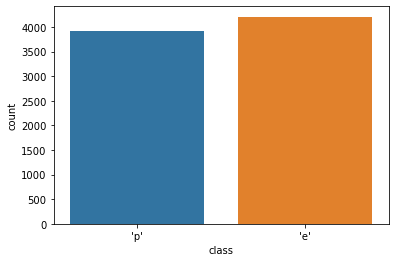

In [24]:
sns.countplot(df["class"])

# Independent and Dependent variables.
- X as independent variable
- y as Dependent variable

In [25]:
X = data.iloc[:, 1:]
y = data.iloc[:,0]

In [26]:
X

,cap-shape_'c',cap-shape_'f',cap-shape_'k',cap-shape_'s',cap-shape_'x',cap-surface_'g',cap-surface_'s',cap-surface_'y',cap-color_'c',cap-color_'e',...,population_'n',population_'s',population_'v',population_'y',habitat_'g',habitat_'l',habitat_'m',habitat_'p',habitat_'u',habitat_'w'
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [27]:
y

0       0
1       1
2       1
3       0
4       1
       ..
8119    1
8120    1
8121    1
8122    0
8123    1
Name: class, Length: 8124, dtype: int64

# Spliting into traning and testing sets

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [29]:
print(X_test.shape)
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)

(1625, 94)
(6499, 94)
(6499,)
(1625,)


# Creating Model
- Using random forest as classifier.

In [30]:
rf = RandomForestClassifier()
rf.fit(X_train ,y_train)

RandomForestClassifier()

In [31]:
y_preds = rf.predict(X_test)

In [32]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       782
           1       1.00      1.00      1.00       843

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [33]:
rf.score(X_test, y_test)

1.0

In [34]:
rf.score(X_train, y_train)

1.0

In [35]:
accuracy_score(y_test, y_preds)

1.0

In [36]:
confusion_matrix(y_test, y_preds)

array([[782,   0],
       [  0, 843]], dtype=int64)

# Creating pickle

In [37]:
import pickle

In [38]:
pickle_out = open("mushroom_Classifier.pkl", "wb")
pickle.dump(rf,pickle_out)
pickle_out.close()